# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import re
import os

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Чтобы библиотеки random и np.random выдавали одну и ту же серию чисел при перезапуске ноутбука")

Чтобы библиотеки random и np.random выдавали одну и ту же серию чисел при перезапуске ноутбука


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
import os

if os.path.exists('cars_train.csv'):
    df_train = pd.read_csv('cars_train.csv')
else:
    df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')

if os.path.exists('cars_test.csv'):
    df_test = pd.read_csv('cars_test.csv')
else:    
    df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [6]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [7]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [8]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



Получим сведения о датафрейме. Увидим тип данных и заметим что есть пропуски

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


Выведем основные статистические данные о числовых признаках в тренировчном датасете.

Можно уже сейчас заметить что у некоторых признаках есть пропуски.

In [11]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [12]:
df_train.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [13]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [14]:
df_test.describe(include=['object'])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


Можно посмотреть количество уникальных значений для трейна и теста дополнительно с помощью nunique.

In [15]:
df_train.nunique(dropna=True)

name             1924
year               29
selling_price     637
km_driven         827
fuel                4
seller_type         3
transmission        2
owner               5
mileage           386
engine            120
max_power         316
torque            419
seats               9
dtype: int64

In [16]:
df_test.nunique(dropna=True)

name             621
year              24
selling_price    274
km_driven        260
fuel               4
seller_type        3
transmission       2
owner              5
mileage          237
engine            88
max_power        182
torque           226
seats              6
dtype: int64

(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [17]:

df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

В трейне есть пропуски в признаках: 
mileage          202
engine           202
max_power        196
torque           203
seats            202

In [18]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В тесте есть пропуски в признаках:
mileage          19
engine           19
max_power        19
torque           19
seats            19

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [19]:
df_train_1= df_train.loc[:, ~df_train.columns.isin(['selling_price'])]
df_train_1

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Найдем индексы в датафрейме дубликатов без первого случая вхождения

In [20]:
Idx = df_train_1.duplicated()
Idx.value_counts()

False    5840
True     1159
dtype: int64

In [21]:
idx_list = df_train_1.index[Idx].tolist()
idx_list

[254,
 258,
 268,
 324,
 325,
 326,
 338,
 357,
 358,
 359,
 360,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 401,
 444,
 482,
 504,
 563,
 564,
 565,
 566,
 567,
 569,
 570,
 571,
 572,
 573,
 574,
 575,
 576,
 577,
 578,
 579,
 706,
 709,
 743,
 766,
 776,
 787,
 925,
 926,
 927,
 928,
 929,
 930,
 931,
 932,
 933,
 934,
 935,
 936,
 937,
 938,
 939,
 940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 966,
 967,
 968,
 969,
 970,
 971,
 972,
 973,
 974,
 975,
 976,
 977,
 978,
 979,
 980,
 981,
 982,
 983,
 984,
 985,
 986,
 987,
 988,
 989,
 990,
 1000,
 1011,
 1093,
 1105,
 1117,
 1123,
 1136,
 1149,
 1151,
 1152,
 1239,
 1250,
 1266,
 1337,
 1338,
 1347,
 1351,
 1353,
 1389,
 1413,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1495,
 1500,
 1542,
 1568,
 1570,
 1571,
 1572,
 1583,
 15

1159 дубликатов.

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [22]:
df_train_1[df_train_1.duplicated()]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [23]:
df_train [(df_train ['name'] == 'Tata Indigo CR4') & (df_train['km_driven'] == 25000) & (df_train['year'] == 2013)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4480,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [24]:
df_train = df_train.drop(index = idx_list)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Осталась действительно только первое вхождение дубликата.

In [25]:
df_train [(df_train ['name'] == 'Tata Indigo CR4') & (df_train['km_driven'] == 25000) & (df_train['year'] == 2013)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4480,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [26]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [27]:
df_train.reset_index(drop= True , inplace= True )
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [28]:

for current_df in (df_train, df_test):
    current_df['max_torque'] = current_df['torque'].str.extract('([\d.]+)Nm', flags=re.IGNORECASE)

# проверим, из каких строк не смогли извлечь данные
unprocessed_train = df_train[df_train['max_torque'].isna()][df_train['torque'].notna()]
unprocessed_test = df_test[df_test['max_torque'].isna()][df_test['torque'].notna()]
unprocessed_train

C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\3288526641.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unprocessed_train = df_train[df_train['max_torque'].isna()][df_train['torque'].notna()]
C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\3288526641.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unprocessed_test = df_test[df_test['max_torque'].isna()][df_test['torque'].notna()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,NaN
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,NaN
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0,NaN
15,Hyundai i20 1.4 CRDi Asta,2012,500000,53000,Diesel,Individual,Manual,Second Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5806,Ford Fiesta 1.4 Duratorq EXI,2007,125000,110000,Diesel,Individual,Manual,Third Owner,17.8 kmpl,1399 CC,68 bhp,"16.3@ 2,000(kgm@ rpm)",5.0,NaN
5822,Honda City 2017-2020 VTEC,2006,160000,70000,Petrol,Individual,Manual,Second Owner,16.9 kmpl,1497 CC,100 bhp,"13.5@ 4,800(kgm@ rpm)",5.0,NaN
5823,Honda City 1.3 EXI,2004,135000,120000,Petrol,Individual,Manual,Second Owner,13.0 kmpl,1343 CC,90 bhp,11.3kgm@ 4700rpm,5.0,NaN
5829,Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV,2010,425000,129000,Diesel,Individual,Manual,First Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0,NaN


In [29]:
import re
# переведем kgm в Nm
for unprocessed_current, current_df in ((unprocessed_train, df_train), (unprocessed_test, df_test)):
    for index, item in unprocessed_current.iterrows():
        # обработаем строки вида 510@ 1600-2400
        r = re.findall('^[\d.]+', item['torque'], flags=re.IGNORECASE)
        if r:
            r = float(r[0])
            if 'kgm' in item['torque'].lower():
                # переводим из kgm в Nm
                r = r * 9.80665
            current_df.loc[index, 'max_torque'] = r
    current_df['max_torque'] = current_df['max_torque'].astype(float)

In [30]:
# извлекаем rpm из строк вида "250Nm@ 1500-2500rpm" или "11.5@ 4,500(kgm@ rpm)""
# ([\d,]+) - все числа и запятые
# (?:\(kgm\@)?\s* - текст "(kgm@ ", вопрос после него ( \(kgm\@)? ) говорит о том, что его может и не быть
# ?: - Группировка без обратной связи, см https://ru.wikipedia.org/wiki/Регулярные_выражения 
for current_df in (df_train, df_test):
    current_df['max_torque_rpm'] = current_df['torque'].str.extract('([\d,]+)(?:(?:\(kgm\@)?\s*rpm)', flags=re.IGNORECASE)

    # строка 11.5@ 4,500(kgm@ rpm) превратится в 4,500, убираем запятые 
    current_df['max_torque_rpm'] = current_df['max_torque_rpm'].replace('[,]', '', regex = True)

# проверим, из каких строк не смогли извлечь данные
unprocessed_train = df_train[df_train['max_torque_rpm'].isna()][df_train['torque'].notna()]
unprocessed_test = df_test[df_test['max_torque_rpm'].isna()][df_test['torque'].notna()]
unprocessed_train

C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\1760078880.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unprocessed_train = df_train[df_train['max_torque_rpm'].isna()][df_train['torque'].notna()]
C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\1760078880.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unprocessed_test = df_test[df_test['max_torque_rpm'].isna()][df_test['torque'].notna()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque,max_torque_rpm
129,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,400.0,NaN
350,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,400.0,NaN
1301,Mercedes-Benz M-Class ML 350 4Matic,2011,1700000,110000,Diesel,Individual,Automatic,Third Owner,0.0 kmpl,2987 CC,165 bhp,510@ 1600-2400,5.0,510.0,NaN
2641,Tata Indigo TDI,2008,210000,100000,Diesel,Individual,Manual,First Owner,19.61 kmpl,1405 CC,70 bhp,135.4Nm@ 2500,5.0,135.4,NaN
3144,Tata Indigo TDI,2010,409999,100000,Diesel,Individual,Manual,Second Owner,19.61 kmpl,1405 CC,70 bhp,135.4Nm@ 2500,5.0,135.4,NaN
3200,Tata Sumo MKII Turbo 2.0 LX,2010,150000,225000,Diesel,Individual,Manual,Third Owner,14.0 kmpl,1948 CC,90 bhp,190Nm@ 2000-3000,9.0,190.0,NaN
3207,Skoda Octavia Classic 1.9 TDI MT,2006,280000,150000,Diesel,Individual,Manual,Third Owner,18.7 kmpl,1896 CC,66 bhp,210 / 1900,5.0,210.0,NaN
4068,Skoda Octavia Classic 1.9 TDI MT,2007,300000,155000,Diesel,Individual,Manual,First Owner,18.7 kmpl,1896 CC,66 bhp,210 / 1900,5.0,210.0,NaN
4210,Skoda Octavia Ambiente 1.9 TDI MT,2007,110000,120000,Diesel,Individual,Manual,Second Owner,18.7 kmpl,1896 CC,66 bhp,210 / 1900,5.0,210.0,NaN
4660,Skoda Octavia Ambiente 1.9 TDI MT,2003,100000,250000,Diesel,Individual,Manual,Second Owner,18.7 kmpl,1896 CC,66 bhp,210 / 1900,5.0,210.0,NaN


In [31]:
for unprocessed_current, current_df in ((unprocessed_train, df_train), (unprocessed_test, df_test)):
    for index, item in unprocessed_current.iterrows():
        # обработаем строки вида 510@ 1600-2400
        r = re.findall('(?:@\s*)(?:\d+-)?(\d+)', item['torque'], flags=re.IGNORECASE)
        if not r:
            # 210 / 1900
            r = re.findall('(?:\d+\s*/\s*)(\d+)', item['torque'], flags=re.IGNORECASE)
        if r and len(r[0]) > 2:
            current_df.loc[index, 'max_torque_rpm'] = r[0]
    current_df['max_torque_rpm'] = current_df['max_torque_rpm'].astype(float)

unprocessed_train = df_train[df_train['max_torque_rpm'].isna()][df_train['torque'].notna()]
unprocessed_train

C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\2959007902.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unprocessed_train = df_train[df_train['max_torque_rpm'].isna()][df_train['torque'].notna()]


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque,max_torque_rpm
129,Volvo XC40 D4 R-Design,2018,3400000,22000,Diesel,Dealer,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,400.0,NaN
350,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,400.0,NaN
4885,Tata Nano Lx BSIV,2010,45000,30400,Petrol,Individual,Manual,Fourth & Above Owner,26.0 kmpl,624 CC,35 bhp,"48@ 3,000+/-500(NM@ rpm)",4.0,48.0,NaN
5697,Volvo S90 D4 Inscription BSIV,2019,5500000,17000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0,400.0,NaN


In [32]:
# удалим столбец torque
del df_train['torque']
del df_test['torque']

In [33]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,250.000000,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,219.668960,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,112.776475,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,5.0,113.750000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,5.0,96.100000,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0,90.000000,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,113.700000,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,235.359600,2750.0


Проверим во всех ли mileage,max_power, engine имеют одинокую размерность едениц измерения.

In [34]:
# проверим, что в колонке mileage все в kmpl
df_train['mileage'][~df_train['mileage'].str.contains('(\d+\.\d+\s?kmpl)', regex=True, na=True)]

C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\440247973.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train['mileage'][~df_train['mileage'].str.contains('(\d+\.\d+\s?kmpl)', regex=True, na=True)]


5        17.3 km/kg
31      33.44 km/kg
81       26.2 km/kg
177      26.6 km/kg
344     20.88 km/kg
           ...     
5300    26.83 km/kg
5307    26.83 km/kg
5535     13.2 km/kg
5597    21.94 km/kg
5683     15.1 km/kg
Name: mileage, Length: 77, dtype: object

In [35]:
# переведем из km/kg в kmpl
for df_current in (df_train, df_test):
    for i in df_current['mileage']:
        if str(i).endswith('km/kg'):
           df_current['mileage'].replace(i, float(i[:-6])*1.40, inplace=True )
        
print(df_train['mileage'].head(10))

   

0     23.4 kmpl
1    21.14 kmpl
2     23.0 kmpl
3     16.1 kmpl
4    20.14 kmpl
5         24.22
6     16.1 kmpl
7    23.59 kmpl
8     20.0 kmpl
9    19.01 kmpl
Name: mileage, dtype: object


In [36]:
#Удалим еденицы измерения и если значение фич  близко к нулю - заменим на Nan
for df_current in (df_train, df_test):
    df_current['mileage'] = df_current['mileage'].replace('[^\d\.]', '', regex = True)
    df_current['mileage'] = df_current['mileage'].astype(float)
    df_current.loc[ df_current['mileage'] < 0.1, 'mileage'] = np.nan

In [37]:
# проверим, что в колонке engine все в kmpl
df_train['engine'][~df_train['engine'].str.contains('(\d\s?CC)', regex=True, na=True)]

C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\3508939964.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train['engine'][~df_train['engine'].str.contains('(\d\s?CC)', regex=True, na=True)]


Series([], Name: engine, dtype: object)

In [38]:
#Удалим еденицы измерения и если значение фич  близко к нулю - заменим на Nan
for df_current in (df_train, df_test):
    df_current['engine'] = df_current['engine'].replace('[^\d\.]', '', regex = True)
    df_current['engine'] = df_current['engine'].astype(float)
    df_current.loc[ df_current['engine'] < 0.1, 'engine'] = np.nan

In [39]:
# проверим, что в колонке max_power все в bhp
df_train['max_power'][~df_train['max_power'].str.contains('([\d.]+\s?bhp)', regex=True, na=True)]

C:\Users\uncle\AppData\Local\Temp\ipykernel_34480\574449070.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_train['max_power'][~df_train['max_power'].str.contains('([\d.]+\s?bhp)', regex=True, na=True)]


476        0
1112       0
2003       0
3586     bhp
Name: max_power, dtype: object

In [40]:
for df_current in (df_train, df_test):
    df_current['max_power'] = df_current['max_power'].replace('[^\d\.]', '', regex = True) # убираем еденицы измерения
    df_current.loc[df_current['max_power'] == '', 'max_power'] = np.nan # в одной из строк была замечена пустая строка 
    df_current['max_power'] = df_current['max_power'].astype(float)
    df_current.loc[df_current['max_power'] < 0.1, 'max_power'] = np.nan # заменим все 0 на Nan

In [41]:
df_train.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.750000,4000.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,24.22,1061.0,57.50,5.0,76.491870,4500.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0,59.000000,2500.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0,170.000000,2400.0
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,160.000000,2000.0
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.0,108.45,5.0,248.000000,2250.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [42]:
median_mileage = df_train['mileage'].median()
median_engine = df_train['engine'].median()
median_max_power = df_train['max_power'].median()
median_seats = df_train['seats'].median()
median_max_torque_rpm = df_train['max_torque_rpm'].median()
median_max_torque = df_train['max_torque'].median ()

In [43]:
for df_current in (df_train, df_test):
    df_current['mileage'] = df_current['mileage'].fillna(median_mileage)
    df_current['engine'] = df_current['engine'].fillna(median_engine)
    df_current['max_power'] = df_current['max_power'].fillna(median_max_power)
    df_current['seats'] = df_current['seats'].fillna(median_seats)
    df_current['max_torque_rpm'] = df_current['max_torque_rpm'].fillna(median_max_torque_rpm)
    df_current['max_torque'] = df_current['max_torque'].fillna(median_max_torque)
df_train.head(10)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.000000,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,219.668960,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,112.776475,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.750000,4000.0
5,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,24.22,1061.0,57.50,5.0,76.491870,4500.0
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0,59.000000,2500.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0,170.000000,2400.0
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0,160.000000,2000.0
9,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,Second Owner,19.01,1461.0,108.45,5.0,248.000000,2250.0


In [44]:
df_train.isna().sum()

name                0
year                0
selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage             0
engine              0
max_power           0
seats             186
max_torque          0
max_torque_rpm      0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [45]:
print("<Место для ответа на вопрос про seats>")

<Место для ответа на вопрос про seats>


In [46]:

for current_df in (df_train, df_test):
    current_df['engine'] = current_df['engine'].astype(int)
    current_df['seats'] = current_df['seats'].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int32  
 10  max_power       5840 non-null   float64
 11  seats           5654 non-null   float64
 12  max_torque      5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(5), int32(1), int64(3), object(5)
memory usage: 616.1+ KB


In [47]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190.000000,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.000000,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.668960,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776475,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,113.750000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5.0,96.100000,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0,90.000000,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,113.700000,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,235.359600,2750.0


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [48]:
df_train_numeric = df_train._get_numeric_data()
df_train_numeric 

,year,selling_price,km_driven,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,2014,450000,145500,23.40,1248,74.00,5.0,190.000000,2000.0
1,2014,370000,120000,21.14,1498,103.52,5.0,250.000000,2500.0
2,2010,225000,127000,23.00,1396,90.00,5.0,219.668960,2750.0
3,2007,130000,120000,16.10,1298,88.20,5.0,112.776475,4500.0
4,2017,440000,45000,20.14,1197,81.86,5.0,113.750000,4000.0
...,...,...,...,...,...,...,...,...,...
5835,2008,120000,191000,17.92,1086,62.10,5.0,96.100000,3000.0
5836,2013,260000,50000,18.90,998,67.10,5.0,90.000000,3500.0
5837,2013,320000,110000,18.50,1197,82.85,5.0,113.700000,4000.0
5838,2007,135000,119000,16.80,1493,110.00,5.0,235.359600,2750.0


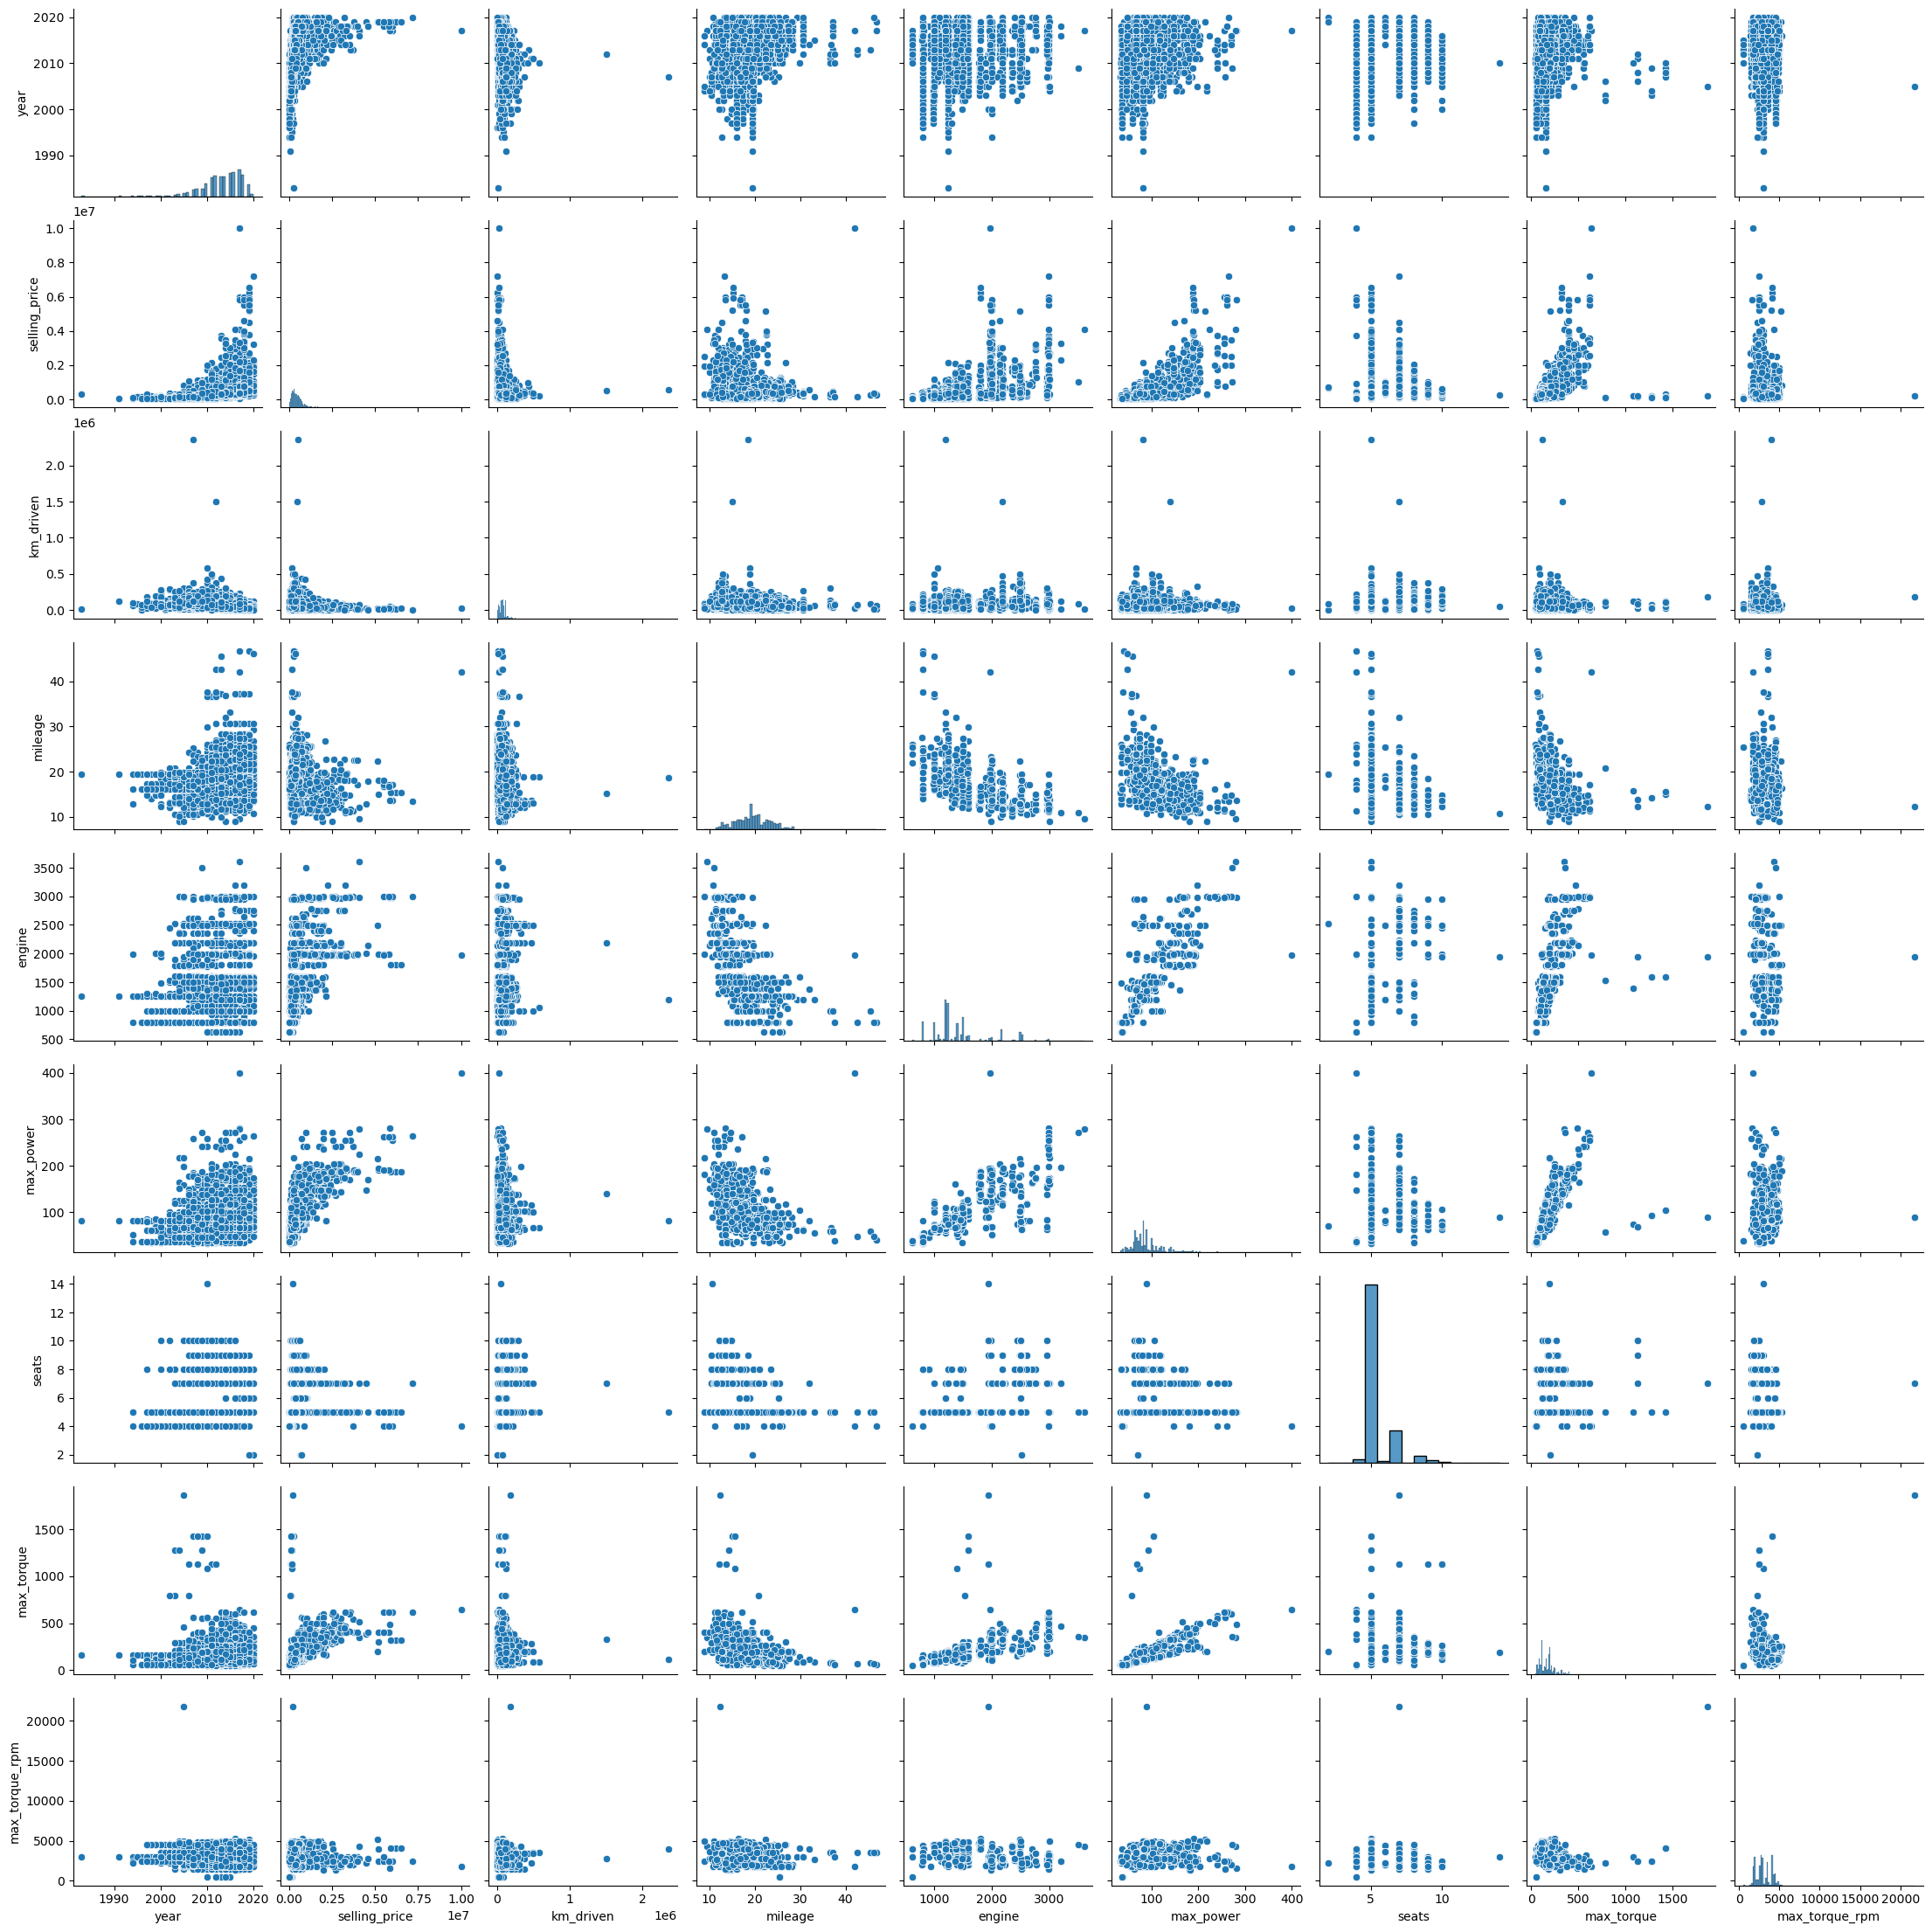

In [49]:
sns.pairplot(df_train._get_numeric_data())

In [50]:
df_train['engine'].value_counts()

1248    944
1197    589
796     338
998     335
2179    283
       ... 
1422      1
2496      1
2487      1
2596      1
1950      1
Name: engine, Length: 120, dtype: int64

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Целевая переменная - selling_price

max_torque_rpm(кол-во оборотов в минуту при котрой достигается максимальный крутящий момент) - не зависит от цены

max_torque (максимальный крут. момент) - коррелируется с ценой, тк это непосредсьвенно характеристика двигателя влиющая на класс машины

seats - особо никак не коррелируется с целевой переменной.например для 5 местной машины цена сильно разбросана относительно цены.

max_power -линейнозависима с ценой. Те чем больше можность машины тем больше цена - что очевидно.

engine - цена так же зависит от обьема двигателя, но чуть меньше чем мощность. Но в целом мощность двигателя прямоппропорциональна обьему двигателя.

mileage - цена уменьшается с увеличением топливной экономичности.

km_driven - цена зависит от пробега. Меньше пробег больше цена.

Year - до 2000 года цена практически не растет. после 2000 гг цена начианет увеличиваться относительно новизне машины, но не прямопорционально. тк видимо влияют и другие характеристики. Например машина новая , но двигатель малой мощности.


Некоторые признаки явно скореллированы.
Mileage - max_power и engine. Чем больше топливная экономичность тем меньше мощность двигателя и обьем двигателя.

max_power и engine - естественно линейнозависимы.

year - max_power и engine - более новые машины стали производить с большим обьемом двигателя и более мощным соответственно, но после 2010 примерно мощность двигателя перестала расти и Mileage (топливная экономичность) стала немного расти.

max_torque  - max_power - engine - явно скоррелированы. 

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

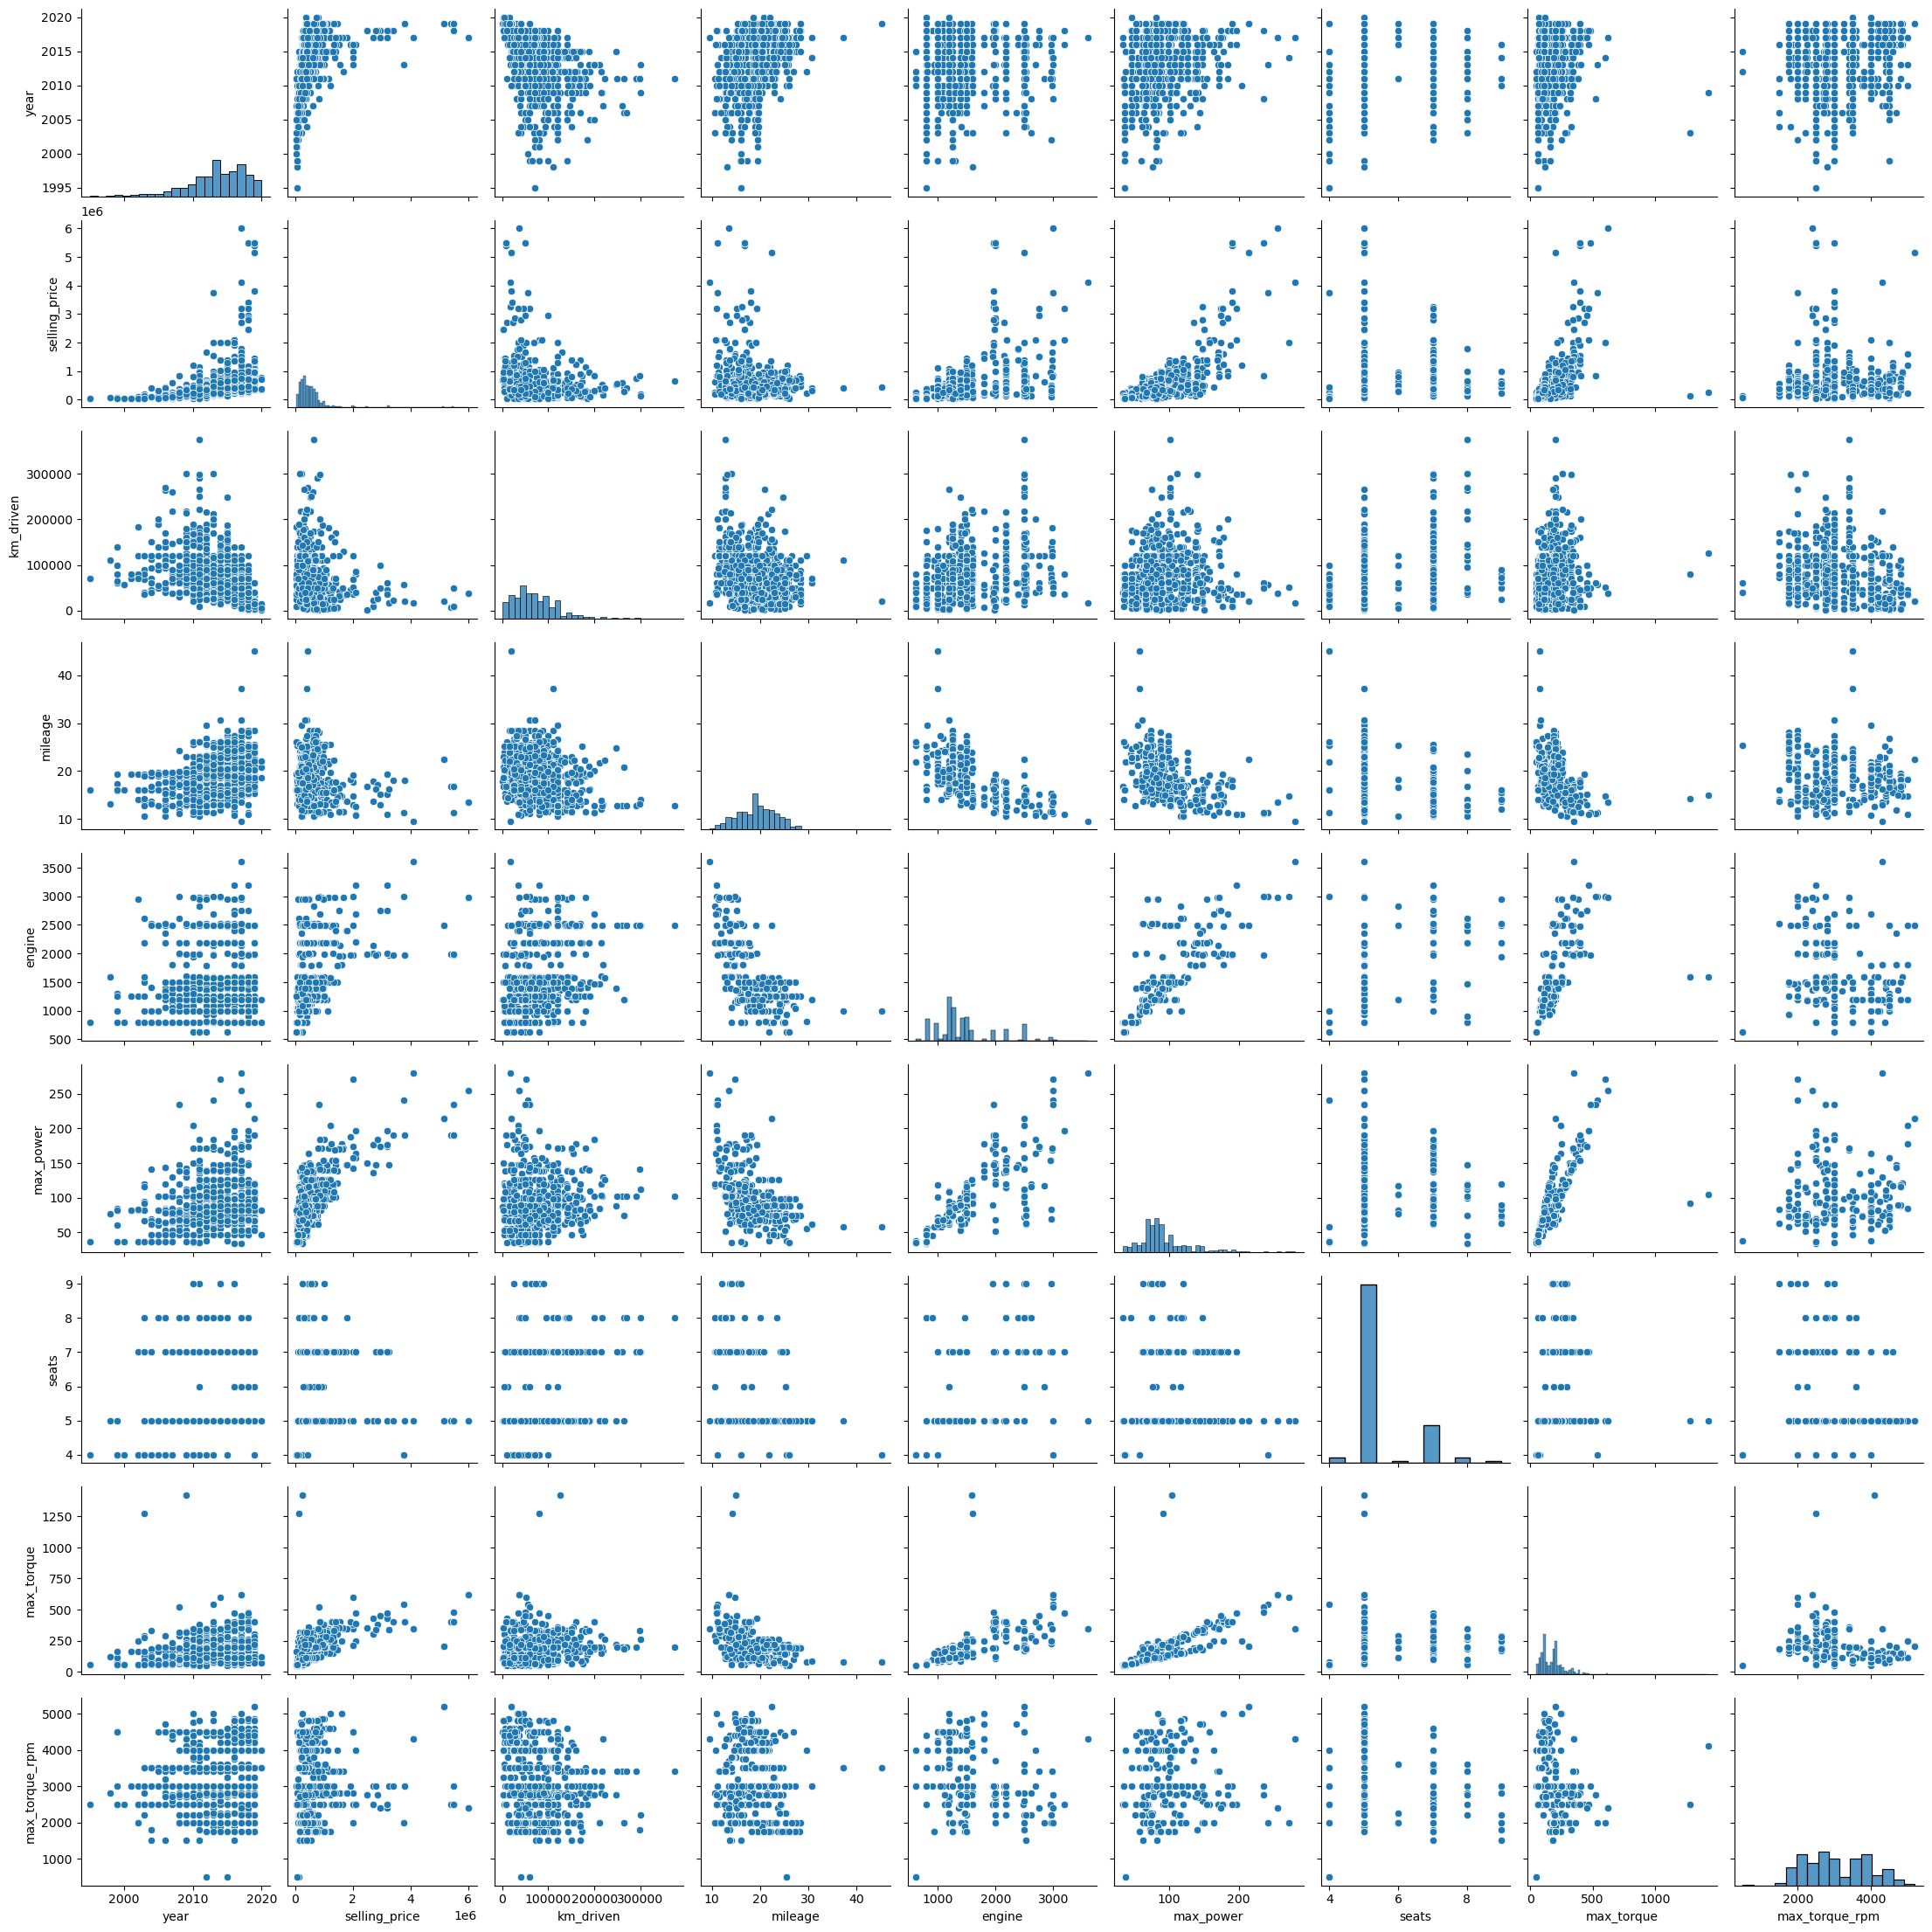

In [51]:
sns.pairplot(df_test._get_numeric_data())

По связи целевой переменной и признаковых в общем связи совпадают.
Если говорить о корреляции признаков - то также совпадают с трейном.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

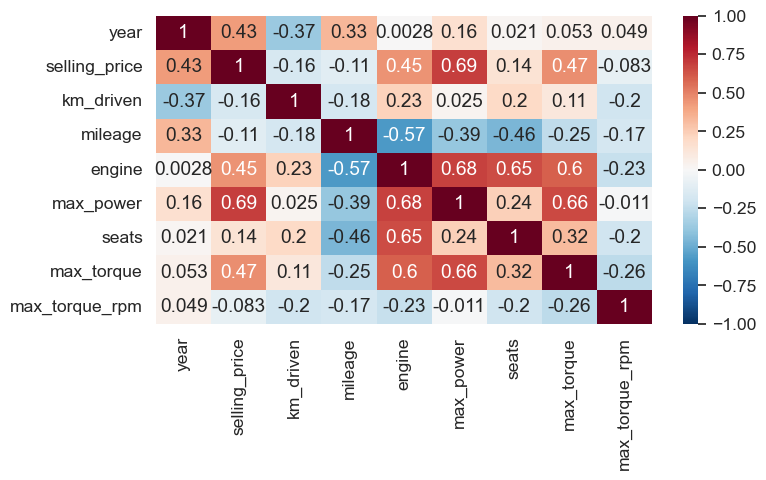

In [52]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_train_numeric.corr(),        
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1); # указывает начало цветовых кодов от -1 до 1.

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Наименее скоррелированы year - engine, km_driven - max_power, max_power - max_torque_rpm (имеется ввиду что нет ни положтельной ни отриц. корреляции)

Максимальная лз между selling_price и max_power (0.69)/ engine и max_power (0.68)/  engine и max_torque (0.6)/ engine и seats (0.65)/max_power и max_torque(0.66) 

Чем меньше год тем больше машина проехала. тк корреляция отрицательна. 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

Text(0, 0.5, 'Max_power')

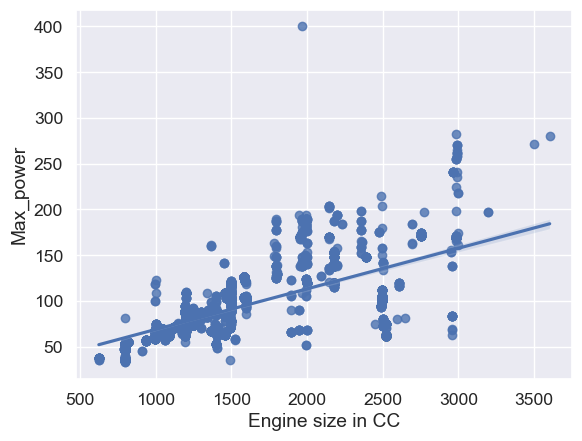

In [53]:
sns.regplot(
    x='engine', 
    y='max_power', 
    data=df_train)
plt.xlabel(
    'Engine size in CC')
plt.ylabel(
    'Max_power')

Text(0, 0.5, 'Max_torque')

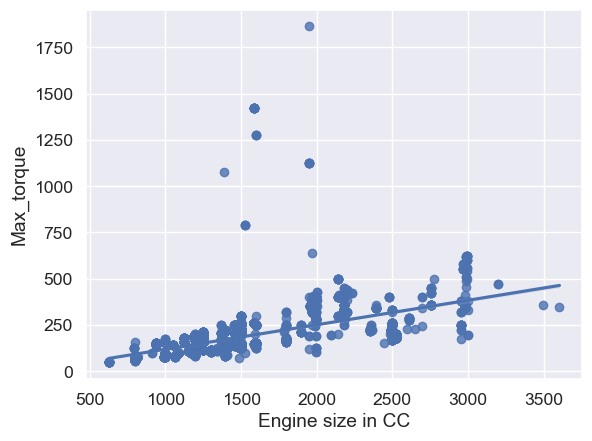

In [54]:
sns.regplot(
    x='engine', 
    y='max_torque', 
    data=df_train)
plt.xlabel(
    'Engine size in CC')
plt.ylabel(
    'Max_torque')

Text(0, 0.5, 'Max_power')

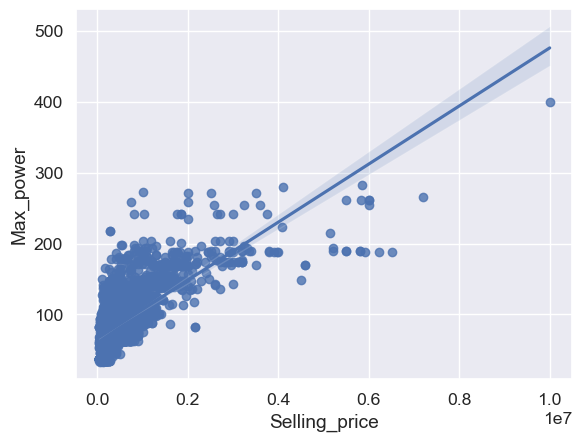

In [55]:
sns.regplot(
    x='selling_price', 
    y='max_power', 
    data=df_train)
plt.xlabel(
    'Selling_price')
plt.ylabel(
    'Max_power')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Можно посмотреть как целевая переменная зависит от категориальных признаков.

видно что цена выше у двигателей с дизельным топливом и особенно если машина с автоматической коробкой передач. Те на цену больше влияет ни то на каком топливерабоатет машина , а автоматическая или ручная коробка передач.

<AxesSubplot: xlabel='year', ylabel='selling_price'>

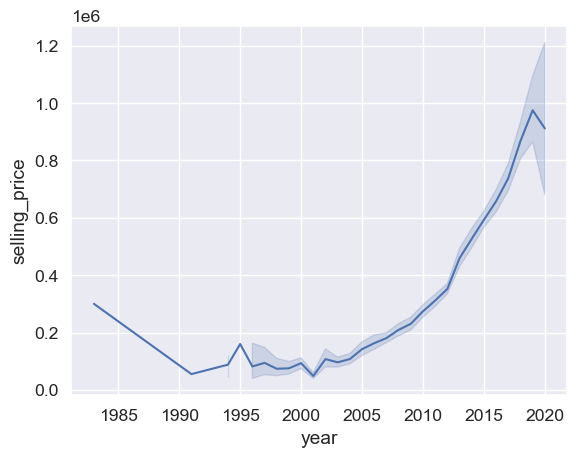

In [56]:
sns.lineplot(
    x="year", 
    y="selling_price",
    data=df_train)

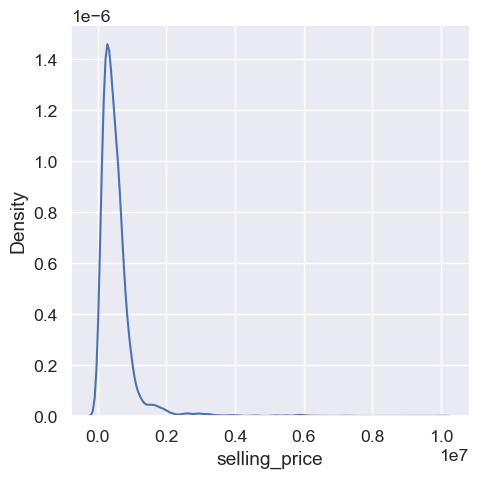

In [57]:
#sns.histplot(df_train["selling_price"], binwidth=0.1)
sns.displot(x='selling_price',
            data=df_train,
            kind="kde")

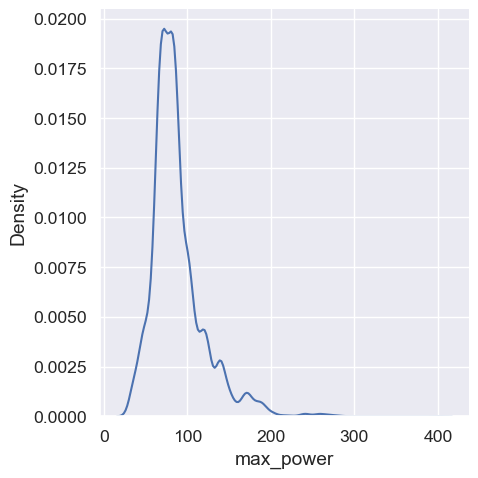

In [58]:
sns.displot(x='max_power',
            data=df_train,
            kind="kde")

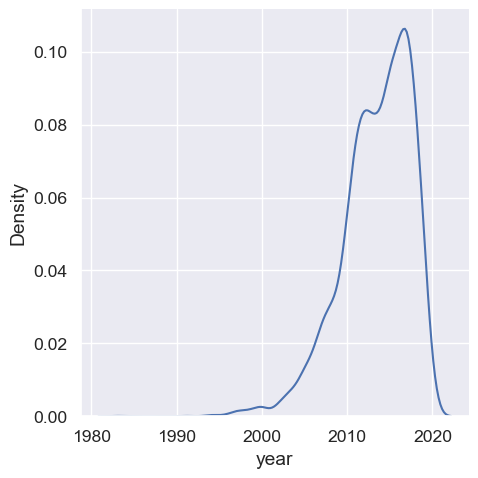

In [59]:
sns.displot(x='year',
            data=df_train,
            kind="kde")

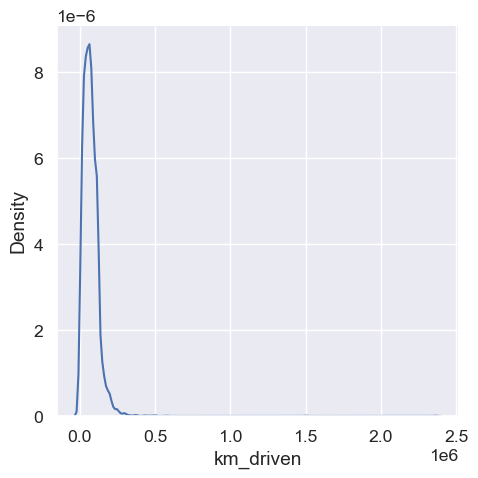

In [60]:
sns.displot(x='km_driven',
            data=df_train,
            kind="kde")

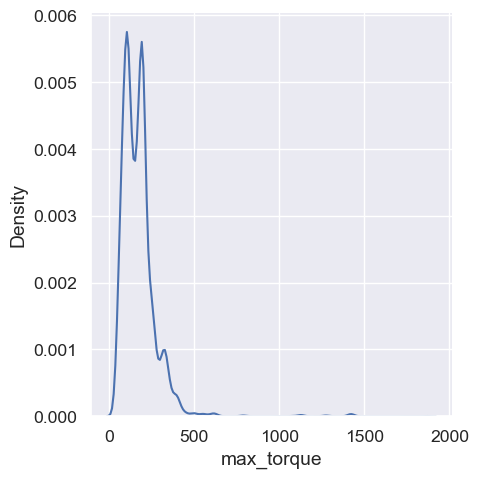

In [61]:
sns.displot(x='max_torque',
            data=df_train,
            kind="kde")

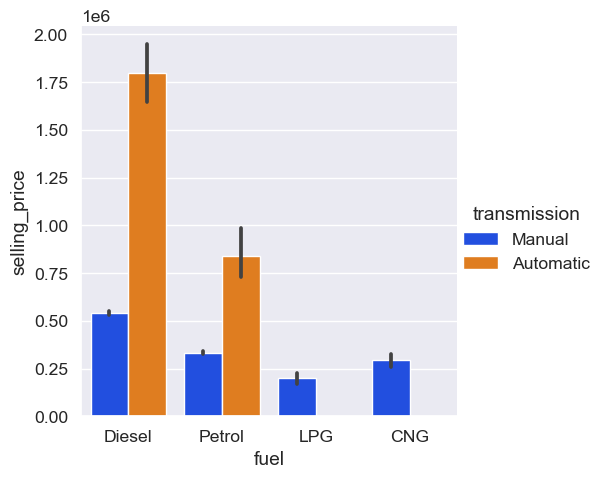

In [62]:
sns.catplot(
    x='fuel', 
    y='selling_price', 
    data=df_train,
    palette='bright',
    kind='bar',
    hue='transmission')

<AxesSubplot: xlabel='owner', ylabel='selling_price'>

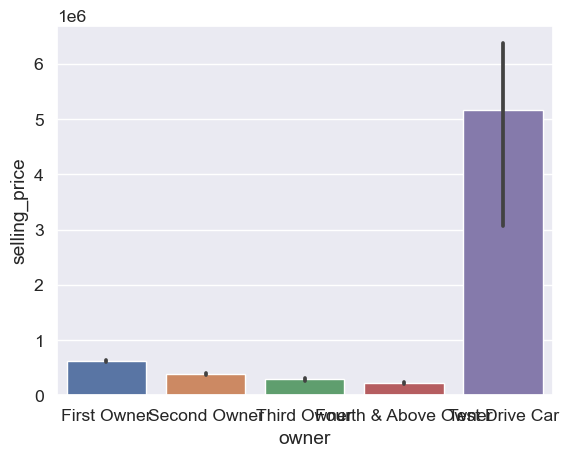

In [63]:
sns.barplot(
    x='owner', 
    y='selling_price', 
    data=df_train)
    #estimator=sum
    #estimator=np.median)

Новые машины естественно дороже. 

<AxesSubplot: xlabel='seller_type', ylabel='selling_price'>

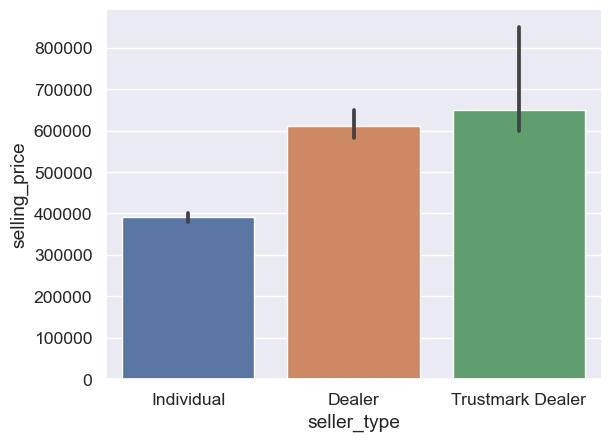

In [64]:
sns.barplot(
    x='seller_type', 
    y='selling_price', 
    data=df_train,
    #estimator=sum
    estimator=np.median)

видно, что наиболее высокая цена у машин приобретенных у проверенных диллеров либо у диллерных продавцов, нежели у частного продавца

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [65]:
y_train = df_train['selling_price']
X_train = df_train._get_numeric_data().drop(columns = ['selling_price'],axis = 1)

y_test = df_test['selling_price']
X_test = df_test._get_numeric_data().drop(columns = ['selling_price'],axis = 1)

#median_seats = X_train['seats'].median ()
#for df_current in (X_train, X_test):
#    df_current['seats'] = df_current['seats'].fillna(median_seats)
#    df_current['seats'] = df_current['seats'].astype(int)

X_train

,year,km_driven,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,2014,145500,23.40,1248,74.00,5,190.000000,2000.0
1,2014,120000,21.14,1498,103.52,5,250.000000,2500.0
2,2010,127000,23.00,1396,90.00,5,219.668960,2750.0
3,2007,120000,16.10,1298,88.20,5,112.776475,4500.0
4,2017,45000,20.14,1197,81.86,5,113.750000,4000.0
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,5,96.100000,3000.0
5836,2013,50000,18.90,998,67.10,5,90.000000,3500.0
5837,2013,110000,18.50,1197,82.85,5,113.700000,4000.0
5838,2007,119000,16.80,1493,110.00,5,235.359600,2750.0


In [66]:
assert X_train.shape == (5840, 8)

In [67]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [69]:
MSE(y_train, model.predict(X_train)),MSE(y_test, model.predict(X_test))

(114053454253.82782, 229401552321.89886)

In [70]:
r2_score(y_train, model.predict(X_train)),r2_score(y_test, model.predict(X_test))

(0.6020997926961721, 0.6009217877718172)

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [71]:
col_nums = ['year', 'km_driven', 'mileage', 'engine','max_power', 'seats','max_torque','max_torque_rpm']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(X_train)
X_train_norm  = pd.DataFrame(data=scaled_features, columns = col_nums)
X_train_norm.head()


,year,km_driven,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,0.139570,1.191152,0.924339,-0.373643,-0.441753,-0.434419,0.136673,-1.136243
1,0.139570,0.766619,0.375519,0.141162,0.493159,-0.434419,0.696709,-0.590180
2,-0.837167,0.883158,0.827203,-0.068879,0.064974,-0.434419,0.413601,-0.317148
3,-1.569719,0.766619,-0.848399,-0.270682,0.007968,-0.434419,-0.584126,1.594072
4,0.872122,-0.482007,0.132678,-0.478663,-0.192823,-0.434419,-0.575040,1.048009


In [72]:
#scaled_features_test = scaler.transform(X_test)
X_test_norm  = pd.DataFrame(data=scaler.transform(X_test), columns = col_nums)
X_test_norm.head()

,year,km_driven,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,-0.837167,1.565740,-1.358365,2.200379,0.761724,1.601702,0.790048,-0.917818
1,0.872122,-0.814974,0.462942,0.139102,0.650878,-0.434419,0.790048,-0.317148
2,-1.569719,2.405866,-1.625490,0.760986,1.331792,-0.434419,-0.031338,1.375647
3,0.383754,1.648982,1.337169,0.141162,0.337340,-0.434419,0.230012,-1.409274
4,-0.592983,-0.065798,-0.751263,-0.530144,-0.726787,-0.434419,-0.740717,-0.044117


Обучим модели на трейне и на тесте еще раз и посмотри как изменился скор

In [73]:
model.fit(X_train_norm, y_train)

LinearRegression()

In [74]:
MSE(y_train, model.predict(X_train_norm)), MSE(y_test, model.predict(X_test_norm))

(114053454253.82764, 229401552321.90012)

In [75]:
r2_score(y_train, model.predict(X_train_norm)), r2_score(y_test, model.predict(X_test_norm))

(0.6020997926961728, 0.600921787771815)

Скор не поменялся, тк нет слишком разных порядков у числовых фич

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [76]:
weights = model.coef_
weights

array([160971.97584636, -49215.50971871,   2481.94124024,  25869.87985071,
       332717.45623417, -26614.3381803 ,   5802.84056807, -55818.50851947])

По весам видно что наиболее информативным для предсказания цены оказался признак max_power. 

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [77]:
from sklearn.linear_model import Lasso

model_l1 = Lasso()
model_l1.fit(X_train_norm, y_train)
pred_l1 = model_l1.predict(X_test_norm)

MSE(y_test,pred_l1)

229402228455.72162

In [78]:
r2_score(y_test, pred_l1)

0.6009206115361969

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [79]:
model_l1.coef_


array([160971.64670376, -49214.38771568,   2480.53046977,  25865.86063358,
       332718.23291113, -26611.54897396,   5802.52765319, -55817.97566272])

С альфа = 1 (параметр по умолчанию) регуляризация L1 накладвает маленький штраф на большие веса. те тк для данной модели веса примерно одного порядка, то с таким коэффциентом альфа - регуляризация не накладвет ограничений на веса. никакие не зануляет.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [80]:
from sklearn.model_selection import GridSearchCV

scoring = {"r2_score": "r2", "MSE": 'neg_mean_squared_error'}

parameters = {'alpha':np.arange(100, 10000, 100)}
grid_cv_model = GridSearchCV(estimator = Lasso(),  
                           param_grid = parameters,
                           scoring = scoring,
                           refit = "r2_score",
                           cv = 10,
                           verbose=0)

grid_cv_model.fit(X_train_norm,y_train)

grid_cv_model.best_score_, grid_cv_model.best_estimator_


(0.5814809115924011, Lasso(alpha=9900))

In [81]:
model_l1 = grid_cv_model.best_estimator_ # модель с L1 регуляризацией

model_l1.fit(X_train_norm,y_train) # обучение модели на трейне

pred_l1 = model_l1.predict(X_test_norm) # предсказание модели на тесте

r2_score(y_test, pred_l1), MSE(y_test, pred_l1), model_l1.coef_


(0.587784269418334,
 236953373021.7052,
 array([ 1.53634977e+05, -3.92239583e+04,  0.00000000e+00,  0.00000000e+00,
         3.36939921e+05, -3.27124543e+02,  1.52384968e+03, -4.59348553e+04]))

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

100 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

alpha=9900 - лучший коэффициент регуляризации. зануялились веса признаков mileage, engine.

In [82]:
# your code here

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [83]:
from sklearn.linear_model import ElasticNet

scoring = {"r2_score": "r2", "MSE": 'neg_mean_squared_error'}

parameters = {'alpha':np.arange(0.1, 2, 0.1)}

grid_cv_model = GridSearchCV(estimator = ElasticNet(),  
                           param_grid = parameters,
                           scoring = scoring,
                           refit = "r2_score",
                           cv = 10,
                           verbose=0)

grid_cv_model.fit(X_train_norm,y_train)

grid_cv_model.best_score_, grid_cv_model.best_estimator_

(0.581711549579157, ElasticNet(alpha=0.2))

In [84]:
model_ElasticNet = grid_cv_model.best_estimator_

model_ElasticNet.fit(X_train_norm,y_train)

pred_ElasticNet = model_ElasticNet.predict(X_test_norm)

r2_score(y_test, pred_ElasticNet), MSE(y_test, pred_ElasticNet), model_ElasticNet.coef_

(0.5779676641590732,
 242596238044.1588,
 array([151478.02819922, -51044.33153337,   5463.95225684,  54058.30025069,
        272375.26978518, -30292.98817435,  32495.1484862 , -39121.94014388]))

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [85]:
grid_cv_model.best_estimator_

ElasticNet(alpha=0.2)

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [86]:
X_train_cat = df_train.drop(columns = ['selling_price','name'],axis = 1)
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190.000000,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.000000,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.668960,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776475,4500.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,113.750000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5.0,96.100000,3000.0
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0,90.000000,3500.0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,113.700000,4000.0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,235.359600,2750.0


In [87]:
X_test_cat = df_test.drop(columns = ['selling_price','name'],axis = 1)
X_test_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm
0,2010,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7.0,260.00000,2200.0
1,2017,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5.0,260.00000,2750.0
2,2007,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5.0,172.00000,4300.0
3,2015,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5.0,200.00000,1750.0
4,2011,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5.0,96.00000,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008,100000,Petrol,Individual,Manual,Second Owner,19.81,1086,68.05,5.0,99.04000,4500.0
996,2017,50000,Petrol,Individual,Manual,Second Owner,18.60,1197,81.83,5.0,114.70000,4000.0
997,2009,40000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.66896,2750.0
998,2012,25000,Petrol,Individual,Manual,First Owner,20.36,1197,78.90,5.0,111.80000,4000.0


In [88]:
assert X_train_cat.shape == (5840, 12)

In [89]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [90]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,534,837,877,623


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [91]:
X_train_cat['seats'].value_counts().sort_index()

2.0        2
4.0       94
5.0     4432
6.0       48
7.0      800
8.0      191
9.0       68
10.0      18
14.0       1
Name: seats, dtype: int64

In [92]:
X_test_cat['seats'].value_counts().sort_index()

4.0     24
5.0    758
6.0      8
7.0    161
8.0     23
9.0      7
Name: seats, dtype: int64

In [93]:
# !pip install category_encoders

In [94]:
# from category_encoders.one_hot import OneHotEncoder

# col_cat = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
# one_hot_enc = OneHotEncoder(cols=col_cat, use_cat_names=True)
# X_train_cat_encoded = one_hot_enc.fit_transform(X_train_cat, drop='first')
# X_train_cat_encoded

from sklearn.preprocessing import OneHotEncoder

columns_cat = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

enc = OneHotEncoder(drop='first', handle_unknown='error')
enc.fit(X_train_cat[columns_cat])

codes = enc.transform(X_train_cat[columns_cat]).toarray()
feature_names = enc.get_feature_names(columns_cat)

#X_train_cat_enc = pd.DataFrame(codes, columns=feature_names).astype(int)

X_train_sum = pd.concat(
     [
        X_train_norm.loc[:, ~X_train_norm.columns.isin(columns_cat)], 
        pd.DataFrame(codes, columns=feature_names).astype(int)
    ], 
axis=1)

codes = enc.transform(X_test_cat[columns_cat]).toarray()
X_test_sum = pd.concat(
     [
        X_test_norm.loc[:, ~X_test_norm.columns.isin(columns_cat)], 
        pd.DataFrame(codes, columns=feature_names).astype(int)
    ], 
axis=1)

# X_train_cat_encoded
X_train_sum

c:\Users\uncle\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,year,km_driven,mileage,engine,max_power,max_torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,seats_nan
0,0.139570,1.191152,0.924339,-0.373643,-0.441753,0.136673,-1.136243,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.139570,0.766619,0.375519,0.141162,0.493159,0.696709,-0.590180,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.837167,0.883158,0.827203,-0.068879,0.064974,0.413601,-0.317148,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.569719,0.766619,-0.848399,-0.270682,0.007968,-0.584126,1.594072,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.872122,-0.482007,0.132678,-0.478663,-0.192823,-0.575040,1.048009,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.406429,-0.707236,-0.818631,-0.739784,-0.044117,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5836,-0.104614,-0.398765,-0.168445,-0.888447,-0.660279,-0.796721,0.501946,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5837,-0.104614,0.600136,-0.265581,-0.478663,-0.161469,-0.575506,1.048009,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5838,-1.569719,0.749971,-0.678410,0.130865,0.698383,0.560056,-0.317148,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Сделаем все то же самое для тестовых данных.


In [95]:
X_test_sum

,year,km_driven,mileage,engine,max_power,max_torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Third Owner,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,seats_10.0,seats_14.0,seats_nan
0,-0.837167,1.565740,-1.358365,2.200379,0.761724,0.790048,-0.917818,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.872122,-0.814974,0.462942,0.139102,0.650878,0.790048,-0.317148,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-1.569719,2.405866,-1.625490,0.760986,1.331792,-0.031338,1.375647,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0.383754,1.648982,1.337169,0.141162,0.337340,0.230012,-1.409274,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,-0.592983,-0.065798,-0.751263,-0.530144,-0.726787,-0.740717,-0.044117,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.325535,0.433652,0.052541,-0.707236,-0.630192,-0.712342,1.594072,0,0,1,...,0,0,1,0,0,0,0,0,0,0
996,0.872122,-0.398765,-0.241297,-0.478663,-0.193773,-0.566172,1.048009,0,0,1,...,0,0,1,0,0,0,0,0,0,0
997,-1.081351,-0.565249,0.827203,-0.068879,0.064974,0.413601,-0.317148,1,0,0,...,0,0,1,0,0,0,0,0,0,0
998,-0.348799,-0.814974,0.186103,-0.478663,-0.286568,-0.593241,1.048009,0,0,1,...,0,0,1,0,0,0,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

scoring = {"r2_score": "r2", "MSE": 'neg_mean_squared_error'}

parameters = {'alpha':np.arange(0.1, 2, 0.1)}

grid_cv_model = GridSearchCV(estimator = Ridge(),  
                           param_grid = parameters,
                           scoring = scoring,
                           refit = "r2_score",
                           cv = 10,
                           verbose=0)

grid_cv_model.fit(X_train_sum, y_train)

grid_cv_model.best_score_ , grid_cv_model.best_estimator_

(0.6260085864818401, Ridge(alpha=1.9000000000000001))

In [97]:
model_l2 = grid_cv_model.best_estimator_

model_l2.fit(X_train_sum,y_train)

pred_l2 = model_l2.predict(X_test_sum)

r2_score(y_test, pred_l2), MSE(y_test, pred_l2), model_l2.coef_

(0.6434155669493444,
 204974914613.66187,
 array([ 156316.87754615,  -27865.76714529,   33205.13382009,
          45470.93583664,  288765.88340772,   15720.81134735,
         -60308.666452  ,   20503.89325238,  192526.76136099,
          76446.96756691, -104103.69547517, -105472.41349815,
        -278554.15299597,  -42881.15468119,  -55051.67039953,
        2218439.03495929,  -42400.82713822,  464687.02580717,
         -52958.66526655, -155437.96275724,  -55926.95491719,
           3476.31629213,  -50068.583361  ,  -32109.23591521,
         -58247.42901858,    4666.82795798]))

Метрика r2 немного улучшилась (0.64). Но не сильно, видимо нужно будет добавлять дополнитьельные фичи. ( тк есть не нормальные распределения признаков и таргета,есть не линейн зависмости)

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [98]:
for current_df in (df_train, df_test):
    current_df['name_model'] = current_df['name'].str.extract('(^\S+)', flags=re.IGNORECASE)

df_train['name_model'].value_counts()

Maruti           1804
Hyundai          1058
Mahindra          611
Tata              534
Toyota            309
Ford              308
Honda             308
Chevrolet         188
Renault           171
Volkswagen        153
Nissan             63
Skoda              61
Datsun             49
Mercedes-Benz      44
BMW                41
Fiat               39
Audi               31
Jeep               20
Mitsubishi          8
Volvo               8
Jaguar              7
Force               4
Isuzu               4
Land                3
MG                  3
Daewoo              3
Kia                 3
Ambassador          3
Lexus               1
Peugeot             1
Name: name_model, dtype: int64

In [99]:
columns_to_drop = ['selling_price', 'name']

X_train = df_train.drop(columns=columns_to_drop, axis = 1)
X_test = df_test.drop(columns=columns_to_drop, axis = 1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm,name_model
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190.000000,2000.0,Maruti
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.000000,2500.0,Skoda
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.668960,2750.0,Hyundai
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776475,4500.0,Maruti
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,113.750000,4000.0,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5.0,96.100000,3000.0,Hyundai
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0,90.000000,3500.0,Maruti
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,113.700000,4000.0,Hyundai
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,235.359600,2750.0,Hyundai


Там где целевая переменная засит от фичи квадратично - можно добавить квадрат фичи(year, km_driven, mileage)

In [100]:
for df in (X_train, X_test):
    df["year^2_log"] = np.log(df["year"].pow(2)) # прологорифмируем те фичи что логнормально распределены
    df["km_driven^2_log"] = np.log(df["km_driven"].pow(2))
    df["mileage^2"] = df["mileage"].pow(2) #эту фичу не логарифмируем тк она имеет норм распредление

X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm,name_model,year^2_log,km_driven^2_log,mileage^2
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190.000000,2000.0,Maruti,15.215756,23.775863,547.5600
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.000000,2500.0,Skoda,15.215756,23.390494,446.8996
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.668960,2750.0,Hyundai,15.211780,23.503885,529.0000
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776475,4500.0,Maruti,15.208793,23.390494,259.2100
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,113.750000,4000.0,Hyundai,15.218733,21.428836,405.6196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5.0,96.100000,3000.0,Hyundai,15.209789,24.320057,321.1264
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0,90.000000,3500.0,Maruti,15.214763,21.639557,357.2100
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,113.700000,4000.0,Hyundai,15.214763,23.216471,342.2500
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,235.359600,2750.0,Hyundai,15.208793,23.373758,282.2400


добавим фичу число лошадей на обьем двигателя и полиномы наиболее скоррелированных признаков между собой 

In [101]:
for df in (X_train, X_test):
    df["pow_per_eng"] = df["max_power"]/df["engine"]
    df["engine_max_power"] = np.log(df["engine"]*df["max_power"])
    df["engine_max_torque"] = np.log(df["engine"]*df["max_torque"])

X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque,max_torque_rpm,name_model,year^2_log,km_driven^2_log,mileage^2,pow_per_eng,engine_max_power,engine_max_torque
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,190.000000,2000.0,Maruti,15.215756,23.775863,547.5600,0.059295,11.433363,12.376322
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,250.000000,2500.0,Skoda,15.215756,23.390494,446.8996,0.069105,11.951651,12.833347
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,219.668960,2750.0,Hyundai,15.211780,23.503885,529.0000,0.064470,11.741176,12.633488
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,112.776475,4500.0,Maruti,15.208793,23.390494,259.2100,0.067951,11.648187,11.893988
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,113.750000,4000.0,Hyundai,15.218733,21.428836,405.6196,0.068388,11.492584,11.821577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5.0,96.100000,3000.0,Hyundai,15.209789,24.320057,321.1264,0.057182,11.119002,11.555646
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0,90.000000,3500.0,Maruti,15.214763,21.639557,357.2100,0.067234,11.111937,11.405563
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,113.700000,4000.0,Hyundai,15.214763,23.216471,342.2500,0.069215,11.504605,11.821137
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,235.359600,2750.0,Hyundai,15.208793,23.373758,282.2400,0.073677,12.009023,12.769657


Приведем к норм распределению некотрые признаки( те, которые логнормально рапределены)

In [102]:
for df in (X_train, X_test):
    df["year_log"] = np.log(df["year"])
    df["km_driven_log"] = np.log(df["km_driven"])
    df["max_power_log"] = np.log(df["max_power"])
    df["max_torque_log"] = np.log(df["max_torque"])

X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,...,year^2_log,km_driven^2_log,mileage^2,pow_per_eng,engine_max_power,engine_max_torque,year_log,km_driven_log,max_power_log,max_torque_log
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,...,15.215756,23.775863,547.5600,0.059295,11.433363,12.376322,7.607878,11.887931,4.304065,5.247024
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,...,15.215756,23.390494,446.8996,0.069105,11.951651,12.833347,7.607878,11.695247,4.639765,5.521461
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,...,15.211780,23.503885,529.0000,0.064470,11.741176,12.633488,7.605890,11.751942,4.499810,5.392122
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,...,15.208793,23.390494,259.2100,0.067951,11.648187,11.893988,7.604396,11.695247,4.479607,4.725408
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5.0,...,15.218733,21.428836,405.6196,0.068388,11.492584,11.821577,7.609367,10.714418,4.405010,4.734003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5.0,...,15.209789,24.320057,321.1264,0.057182,11.119002,11.555646,7.604894,12.160029,4.128746,4.565389
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5.0,...,15.214763,21.639557,357.2100,0.067234,11.111937,11.405563,7.607381,10.819778,4.206184,4.499810
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0,...,15.214763,23.216471,342.2500,0.069215,11.504605,11.821137,7.607381,11.608236,4.417032,4.733563
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0,...,15.208793,23.373758,282.2400,0.073677,12.009023,12.769657,7.604396,11.686879,4.700480,5.461115


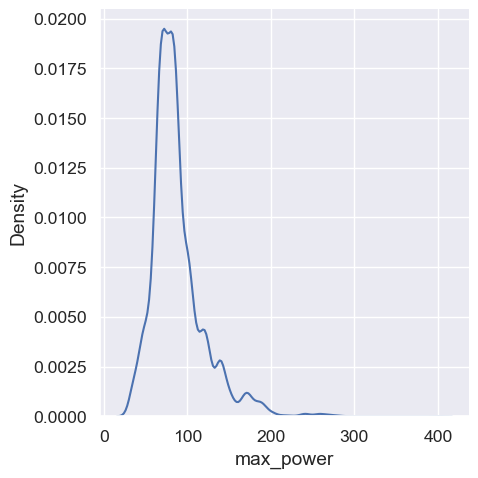

In [103]:
sns.displot(x='max_power',
            data=X_train,
            kind="kde")

удалим year, km_driven, mileage - тк привели эти признаки к квадрату. тк целевая пременная зависит больше от квадрата этих значений

In [104]:

X_train = X_train.drop(columns = ['year','km_driven', "max_power", "max_torque"], axis = 1)
X_test = X_test.drop(columns = ['year','km_driven', "max_power", "max_torque"], axis = 1)
X_train

,fuel,seller_type,transmission,owner,mileage,engine,seats,max_torque_rpm,name_model,year^2_log,km_driven^2_log,mileage^2,pow_per_eng,engine_max_power,engine_max_torque,year_log,km_driven_log,max_power_log,max_torque_log
0,Diesel,Individual,Manual,First Owner,23.40,1248,5.0,2000.0,Maruti,15.215756,23.775863,547.5600,0.059295,11.433363,12.376322,7.607878,11.887931,4.304065,5.247024
1,Diesel,Individual,Manual,Second Owner,21.14,1498,5.0,2500.0,Skoda,15.215756,23.390494,446.8996,0.069105,11.951651,12.833347,7.607878,11.695247,4.639765,5.521461
2,Diesel,Individual,Manual,First Owner,23.00,1396,5.0,2750.0,Hyundai,15.211780,23.503885,529.0000,0.064470,11.741176,12.633488,7.605890,11.751942,4.499810,5.392122
3,Petrol,Individual,Manual,First Owner,16.10,1298,5.0,4500.0,Maruti,15.208793,23.390494,259.2100,0.067951,11.648187,11.893988,7.604396,11.695247,4.479607,4.725408
4,Petrol,Individual,Manual,First Owner,20.14,1197,5.0,4000.0,Hyundai,15.218733,21.428836,405.6196,0.068388,11.492584,11.821577,7.609367,10.714418,4.405010,4.734003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Petrol,Individual,Manual,First Owner,17.92,1086,5.0,3000.0,Hyundai,15.209789,24.320057,321.1264,0.057182,11.119002,11.555646,7.604894,12.160029,4.128746,4.565389
5836,Petrol,Individual,Manual,Second Owner,18.90,998,5.0,3500.0,Maruti,15.214763,21.639557,357.2100,0.067234,11.111937,11.405563,7.607381,10.819778,4.206184,4.499810
5837,Petrol,Individual,Manual,First Owner,18.50,1197,5.0,4000.0,Hyundai,15.214763,23.216471,342.2500,0.069215,11.504605,11.821137,7.607381,11.608236,4.417032,4.733563
5838,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,5.0,2750.0,Hyundai,15.208793,23.373758,282.2400,0.073677,12.009023,12.769657,7.604396,11.686879,4.700480,5.461115


Отнормируем числовые фичи

In [105]:
import pickle
from sklearn.preprocessing import OneHotEncoder, StandardScaler

columns_cat = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
column_name_model = ['name_model']
columns_cat_all = columns_cat + column_name_model
#columns_nums = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'max_torque','max_torque_rpm']
columns_nums = [column for column in X_train.columns if column not in columns_cat_all]

# нормировка данных
scaler = StandardScaler()
scaler.fit(X_train[columns_nums])

scaled_features = scaler.transform(X_train[columns_nums])
X_train_with_features = pd.concat(
     [
        X_train.loc[:, ~X_train.columns.isin(columns_nums)], 
        pd.DataFrame(data=scaled_features, columns=columns_nums)
    ], 
axis=1)

scaled_features = scaler.transform(X_test[columns_nums])
X_test_with_features = pd.concat(
     [
        X_test.loc[:, ~X_test.columns.isin(columns_nums)], 
        pd.DataFrame(data=scaled_features, columns=columns_nums)
    ], 
axis=1)

# OneHotEncoder для columns_cat
enc = OneHotEncoder(drop='first', handle_unknown='error')
enc.fit(X_train_with_features[columns_cat])
enc_feature_names = enc.get_feature_names(columns_cat)

codes = enc.transform(X_train_with_features[columns_cat]).toarray()
X_train_with_features = pd.concat(
     [
        X_train_with_features.loc[:, ~X_train_with_features.columns.isin(columns_cat)], 
        pd.DataFrame(codes, columns=enc_feature_names).astype(int)
    ], 
axis=1)

codes = enc.transform(X_test_with_features[columns_cat]).toarray()
X_test_with_features = pd.concat(
     [
        X_test_with_features.loc[:, ~X_test_with_features.columns.isin(columns_cat)], 
        pd.DataFrame(codes, columns=enc_feature_names).astype(int)
    ], 
axis=1)

# OneHotEncoder для name_model
enc_name_model = OneHotEncoder(handle_unknown='ignore', min_frequency=10)
enc_name_model.fit(X_train_with_features[column_name_model])
enc_name_model_feature_names = enc_name_model.get_feature_names(column_name_model)

codes = enc_name_model.transform(X_train_with_features[column_name_model]).toarray()
X_train_with_features = pd.concat(
     [
        X_train_with_features.loc[:, ~X_train_with_features.columns.isin(column_name_model)], 
        pd.DataFrame(codes, columns=enc_name_model_feature_names).astype(int)
    ], 
axis=1)

codes = enc_name_model.transform(X_test_with_features[column_name_model]).toarray()
X_test_with_features = pd.concat(
     [
        X_test_with_features.loc[:, ~X_test_with_features.columns.isin(column_name_model)], 
        pd.DataFrame(codes, columns=enc_name_model_feature_names).astype(int)
    ], 
axis=1)

# X_train_cat_encoded
X_train_with_features

c:\Users\uncle\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\uncle\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,mileage,engine,max_torque_rpm,year^2_log,km_driven^2_log,mileage^2,pow_per_eng,engine_max_power,engine_max_torque,year_log,...,name_model_Mahindra,name_model_Maruti,name_model_Mercedes-Benz,name_model_Nissan,name_model_Renault,name_model_Skoda,name_model_Tata,name_model_Toyota,name_model_Volkswagen,name_model_infrequent_sklearn
0,0.924339,-0.373643,-1.136243,0.140422,1.146433,0.839394,-0.277782,-0.344182,0.158749,0.140422,...,0,1,0,0,0,0,0,0,0,0
1,0.375519,0.141162,-0.590180,0.140422,0.911336,0.263400,0.525397,0.533025,0.762787,0.140422,...,0,0,0,0,0,1,0,0,0,0
2,0.827203,-0.068879,-0.317148,-0.835989,0.980511,0.733191,0.145891,0.176795,0.498638,-0.835989,...,0,0,0,0,0,0,0,0,0,0
3,-0.848399,-0.270682,1.594072,-1.569572,0.911336,-0.810590,0.430857,0.019410,-0.478739,-1.569572,...,0,1,0,0,0,0,0,0,0,0
4,0.132678,-0.478663,1.048009,0.871457,-0.285387,0.027189,0.466629,-0.243949,-0.574443,0.871457,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,-0.406429,-0.707236,-0.044117,-1.324923,1.478423,-0.456295,-0.450733,-0.876239,-0.925916,-1.324923,...,0,0,0,0,0,0,0,0,0,0
5836,-0.168445,-0.888447,0.501946,-0.103499,-0.156835,-0.249819,0.372221,-0.888197,-1.124277,-0.103499,...,0,1,0,0,0,0,0,0,0,0
5837,-0.265581,-0.478663,1.048009,-0.103499,0.805173,-0.335422,0.534340,-0.223603,-0.575024,-0.103499,...,0,0,0,0,0,0,0,0,0,0
5838,-0.678410,0.130865,-0.317148,-1.569572,0.901126,-0.678809,0.899674,0.630128,0.678610,-1.569572,...,0,0,0,0,0,0,0,0,0,0


Приведем к норм распредлению целевую переменнную

In [106]:
y_train = np.log(y_train)
#y_test = np.log(y_test)
y_train

0       13.017003
1       12.821258
2       12.323856
3       11.775290
4       12.994530
          ...    
5835    11.695247
5836    12.468437
5837    12.676076
5838    11.813030
5839    12.853176
Name: selling_price, Length: 5840, dtype: float64

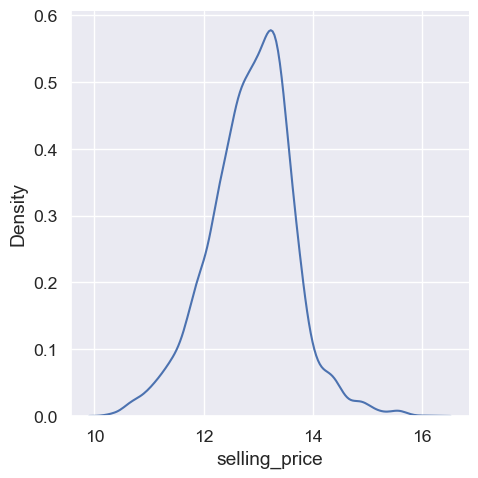

In [107]:
sns.displot(x = y_train,
            data=df_train,
            kind="kde")

In [111]:
scoring = {"r2_score": "r2", "MSE": 'neg_mean_squared_error'}

parameters = {'alpha':np.arange(0.1, 2 , 0.1)}

grid_cv_model = GridSearchCV(
    estimator = Ridge(),  
    #estimator = ElasticNet(),
    param_grid = parameters,
    scoring = scoring,
    refit = "r2_score",
    cv = 10,
    verbose=0
)

grid_cv_model.fit(X_train_with_features, y_train)

print('GridSearchCV results:', grid_cv_model.best_score_ , grid_cv_model.best_estimator_, '\n')

model = grid_cv_model.best_estimator_

model.fit(X_train_with_features, y_train)

pred = np.exp(model.predict(X_test_with_features))

print('Test predictions score:', '\n', 'R2:', r2_score(y_test, pred), '\n', 'MSE:', MSE(y_test, pred), '\n', 'Coef:', '\n', model.coef_)

with open('model.pickle', 'wb') as f: 
    pickle.dump({
        'median_mileage': median_mileage,
        'median_engine': median_engine,
        'median_max_power': median_max_power,
        'median_seats': median_seats,
        'median_max_torque_rpm': median_max_torque_rpm,
        'median_max_torque': median_max_torque,

        'scaler': scaler,
        'enc': enc,
        'enc_feature_names': enc_feature_names,
        'enc_name_model': enc_name_model,
        'enc_name_model_feature_names': enc_name_model_feature_names,
        'model': model,
        'y_test_pred': pred,
    }, f)

GridSearchCV results: 0.8860560383186071 Ridge(alpha=0.1) 

Test predictions score: 
 R2: 0.8741660567259191 
 MSE: 72332943862.52985 
 Coef: 
 [ 0.03672312  0.05647021  0.01196596  0.20758156 -0.02509286 -0.02800591
  0.20806395  0.33515631  0.24677945  0.20758156 -0.02509286 -0.2070563
 -0.16101705  0.32270777  0.17279773  0.03896378 -0.03912751 -0.01000511
 -0.09019795 -0.14887137 -0.08254695  0.67954512 -0.10178488  0.16297423
  0.15048254  0.06504611  0.28771449  0.25647183  0.27407461  0.35407606
  0.15974927  0.04590577  0.36701105  0.50627814 -0.37779786 -0.32157618
 -0.27684157 -0.13335003  0.00187224 -0.04747586  0.1109596  -0.12708459
  0.03384557  0.54531534 -0.04733293 -0.10589076 -0.10060056 -0.43837525
  0.23699229 -0.09442664  0.268478  ]


In [109]:
#coef_table = pd.DataFrame(list(X>columns()).copy
#coef_table.insert(len.coef_table.columns),'Coefs',model_coef_transpose())
#coef_table.sort_values()

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [110]:
def business_metrics(y_true, y_pred):
    in_range = y_pred[(y_true * 0.9 <= y_pred) & (y_pred <= y_true * 1.1)]
    return len(in_range) / len(y_pred)

business_metrics(y_test, pred)

0.381

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link